In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
advertising_data = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/098bb2e9-83fb-48df-9dd1-fac56fbb25ca/advertising.csv')
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
advertising_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


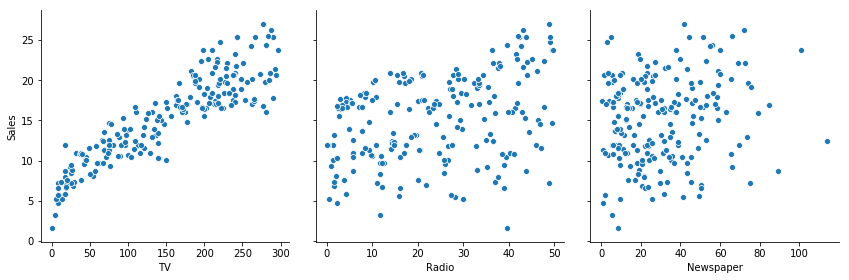

In [23]:
sns.pairplot(x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', data=advertising_data, height=4, aspect=1)
plt.show()

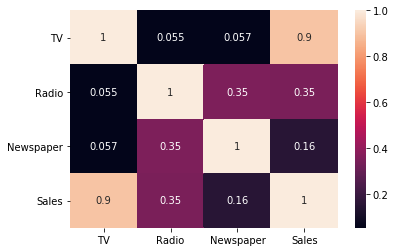

In [26]:
sns.heatmap(advertising_data.corr(), annot=True)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(advertising_data['TV'], advertising_data['Sales'], train_size=0.7, test_size=0.3, random_state=100)


In [56]:
x_train.describe()

count    140.000000
mean     147.711429
std       92.866185
min        0.700000
25%       66.700000
50%      145.100000
75%      230.600000
max      296.400000
Name: TV, dtype: float64

In [57]:
x_test.describe()

count     60.000000
mean     145.481667
std       67.379066
min        7.800000
25%       89.075000
50%      164.000000
75%      203.575000
max      248.800000
Name: TV, dtype: float64

In [58]:
x_train_with_constant = sm.add_constant(x_train)
x_train_with_constant.describe()

,const,TV
count,140.0,140.000000
mean,1.0,147.711429
std,0.0,92.866185
min,1.0,0.700000
25%,1.0,66.700000
50%,1.0,145.100000
75%,1.0,230.600000
max,1.0,296.400000


In [59]:
lr = sm.OLS(y_train, x_train_with_constant).fit()

In [60]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [61]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 12 May 2019   Prob (F-statistic):           1.52e-52
Time:                        19:23:10   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

**Key statistics fromt the summary**
Values considered are:
    1. Coefficient and P-Value
    2. R-Squared
    3. F-Stats & Significance

**1. The coefficient of TV is 0.0545 with very low p value**<br>
The cofficient is statistically significant and can be purely by chance. 

**2. R-Squared value is 0.816 which is a confidence of 81.6%**<br>
Meaning 81.6% of variance is sales is explained by TV advertisements

**3. F-stats P value has very low which is almost "0"**<br>
Meaning that model is fit is statisticaly significant, and the explained significance isn't purely by change. 

For the summary we got the linear equation will be: **Sales = 6.9487 + 0.0545 * TV**

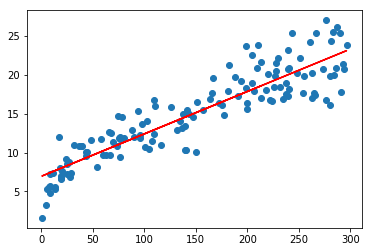

In [62]:
plt.scatter(x_train, y_train)
plt.plot(x_train, (6.9487 + 0.0545*x_train), 'r')
plt.show()

In [68]:
y_train_pred = lr.predict(x_train_with_constant)
residual = y_train - y_train_pred
residual.head()

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
dtype: float64

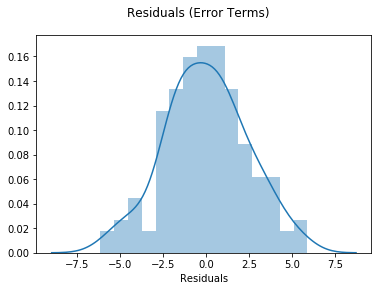

In [75]:
fig = plt.figure()
sns.distplot(residual, bins=15)
fig.suptitle('Residuals (Error Terms)')
plt.xlabel('Residuals')
plt.show()

**Looking at the patterns at the residuals**

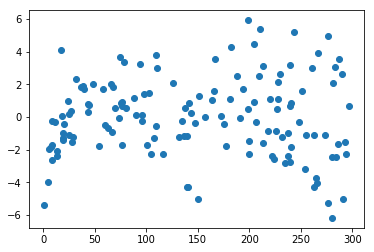

In [80]:
plt.figure()
plt.scatter(x_train, residual)
plt.show()

In [87]:
x_test_with_const = sm.add_constant(x_test)
y_test_pred = lr.predict(x_test_with_const)
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [89]:
help(mean_squared_error)

Help on function mean_squared_error in module sklearn.metrics.regression:

mean_squared_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
    Mean squared error regression loss
    
    Read more in the :ref:`User Guide <mean_squared_error>`.
    
    Parameters
    ----------
    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape = (n_samples), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average']
        or array-like of shape (n_outputs)
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
    
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
    
        'uniform_average' :
            Er

In [93]:
np.sqrt(mean_squared_error(y_test, y_test_pred)) 

2.019296008966233

In [95]:
r_squred = r2_score(y_test, y_test_pred)
r_squred

0.7921031601245658

##### Visualizing the fit of regression

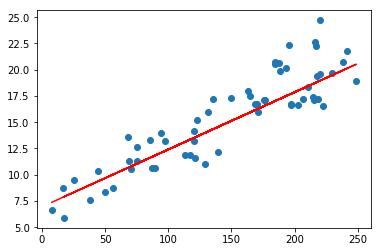

In [100]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()

### Sklenarn linear regression

In [101]:
from sklearn.linear_model import LinearRegression

In [104]:
sk_x_train, sk_x_test, sk_y_train, sk_y_test = train_test_split(advertising_data['TV'], advertising_data['Sales'], train_size=0.7, test_size=0.3, random_state=100)


In [111]:
sk_x_train = sk_x_train.values.reshape( -1, 1)
sk_x_test = sk_x_test.values.reshape( -1, 1)
sk_y_train = sk_y_train.values.reshape( -1, 1)
sk_y_test = sk_y_test.values.reshape( -1, 1)


In [112]:
sk_lr = LinearRegression()
sk_lr.fit(sk_x_test, sk_y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
sk_lr.intercept_

array([6.72675504])

In [117]:
sk_lr.coef_

array([[0.05976637]])

In [120]:
sk_y_test_pred = sk_lr.predict(sk_x_test)

In [123]:
sk_y_test_pred[0:10]

array([[ 7.19293276],
       [20.9631052 ],
       [14.80716874],
       [19.73789455],
       [21.17228751],
       [19.08644108],
       [15.04623423],
       [18.53659044],
       [19.66019826],
       [19.68410481]])